# `mammos_mumag` quickstart

`mammos_mumag` can compute hysteresis loops of magnetic materials using finite elements.

Requirements:
- `mammos` and `esys-escript`

In [1]:
import mammos_entity as me
import mammos_units as u
import pandas as pd
from mammos_mumag import hysteresis, mesh

In [2]:
u.set_enabled_equivalencies(u.magnetic_flux_field())

## Hysteresis simulation

The `hysteresis.run` function computes a hysteresis loop for a homogeneous material with given parameters. We need to pass in a suitable mesh, `mammos_mumag.mesh` provides a sample mesh.

In [3]:
hysteresis_result = hysteresis.run(
    mesh_filepath=mesh.CUBE_20_nm,
    Ms=me.Ms(1280000, unit="A/m"),
    A=me.A(7.7e-12, unit="J/m"),
    K1=me.Ku(4300000, unit="J/m3"),
    hstart=(10 * u.T).to("A/m"),
    hfinal=(-10 * u.T).to("A/m"),
    hnsteps=20,
)

## Hysteresis result object

The returned `results_hysteresis` object provides a `plot` method to visualize the computed data. `mammos_mumag.hysteresis` only computes half a hysteresis loop, going from `hstart` to `hfinal`. To show a full loop this function mirrors the computed data and plots it twice:

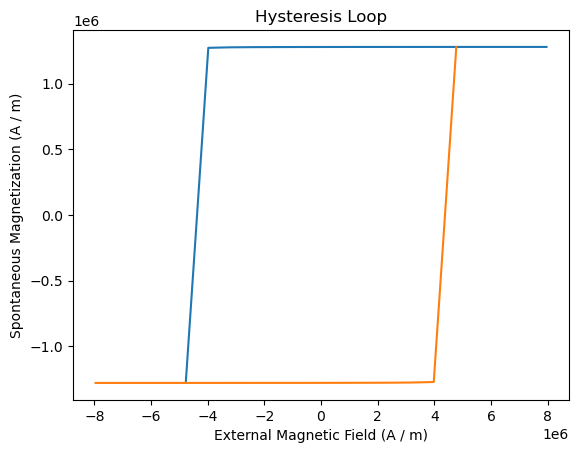

In [4]:
hysteresis_result.plot();

To only see the actual simulation, we can use the flag `duplicate=False`:

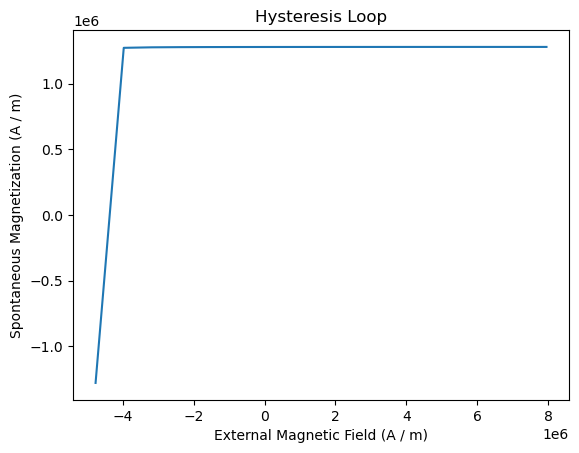

In [5]:
hysteresis_result.plot(duplicate=False);

The results object provides access to `H`, `M` and the energy density:

In [6]:
hysteresis_result.H

Entity(ontology_label='ExternalMagneticField', value=array([ 7957747.15026276,  7161972.43523649,  6366197.72021021,
        5570423.00518393,  4774648.29015766,  3978873.57513138,
        3183098.86010511,  2387324.14507883,  1591549.43005255,
         795774.71502628,        0.        ,  -795774.71502628,
       -1591549.43005255, -2387324.14507883, -3183098.86010511,
       -3978873.57513138, -4774648.29015766]), unit='A / m')

In [7]:
hysteresis_result.M

Entity(ontology_label='SpontaneousMagnetization', value=array([ 1279889.69852942,  1279875.8222883 ,  1279859.14516496,
        1279838.85733375,  1279813.83287613,  1279782.46890957,
        1279742.42008568,  1279690.14264963,  1279620.07356178,
        1279523.06653747,  1279383.19818258,  1279170.65048994,
        1278823.93770141,  1278197.82587937,  1276869.83117496,
        1273020.97305969, -1279813.83301959]), unit='A / m')

In [8]:
hysteresis_result.energy_density

Entity(ontology_label='EnergyDensity', value=array([-16778187.08880844, -15498304.12158992, -14218436.37373519,
       -12938587.02958595, -11658760.23093237, -10378961.46710003,
        -9099198.17323738,  -7819480.67950905,  -6539823.77827088,
        -5260249.43804744,  -3980791.78558299,  -2701506.94435504,
        -1422494.39483802,   -143949.74970699,   1133677.37375769,
         2409024.64232318, -11658760.23093035]), unit='J / m3')

The attribute `configuration_type` contains a list of indices that refer to saved magnetization field configurations. We will use this information later.

In [9]:
hysteresis_result.configuration_type

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

We can also get the hysteresis data as a pandas dataframe in SI units:

In [10]:
hysteresis_result.dataframe

,configuration_type,H,M,energy_density
0,1,7.957747e+06,1.279890e+06,-1.677819e+07
1,1,7.161972e+06,1.279876e+06,-1.549830e+07
2,1,6.366198e+06,1.279859e+06,-1.421844e+07
3,1,5.570423e+06,1.279839e+06,-1.293859e+07
4,1,4.774648e+06,1.279814e+06,-1.165876e+07
5,1,3.978874e+06,1.279782e+06,-1.037896e+07
6,1,3.183099e+06,1.279742e+06,-9.099198e+06
7,1,2.387324e+06,1.279690e+06,-7.819481e+06
8,1,1.591549e+06,1.279620e+06,-6.539824e+06
9,1,7.957747e+05,1.279523e+06,-5.260249e+06


We can generate a table in alternate units:

In [11]:
df = pd.DataFrame(
    {
        "mu0_H": hysteresis_result.H.q.to(u.T),
        "J": hysteresis_result.M.q.to(u.T),
    },
)
df.head()

,mu0_H,J
0,10.0,1.608357
1,9.0,1.608339
2,8.0,1.608318
3,7.0,1.608293
4,6.0,1.608261


## Visualizing magnetization configurations

To plot the hysteresis loop (including the available configurations), run

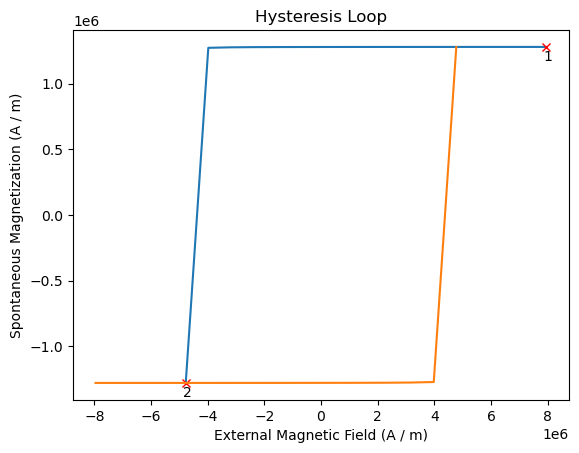

In [12]:
hysteresis_result.plot(configuration_marks=True);

We can get the location of the saved configurations from the attribute `configurations`:

In [13]:
hysteresis_result.configurations

{1: PosixPath('/home/petrocch/repo/mammos/mammos-mumag/examples/hystloop/hystloop_0001.vtu'),
 2: PosixPath('/home/petrocch/repo/mammos/mammos-mumag/examples/hystloop/hystloop_0002.vtu')}

To inspect the configurations more conveniently directly in the notebook we can use the `plot_configuration` function of `hysteresis_result`. We need to pass the index and get an interactive 3D plot (using pyvista):

In [14]:
hysteresis_result.plot_configuration(1)

Widget(value='<iframe src="http://localhost:46633/index.html?ui=P_0x7ff495557b90_0&reconnect=auto" class="pyvi…

Note: the small object size is a consequence of the empty sphere around the cube.

## Passing a different mesh

The `hysteresis.run` function can also take custom meshes that fulfil certain properties.
- the mesh must be in `.fly` format
- the mesh must consist of three regions:
  - the first region is the material (a cube in our case) to which the material parameters will be assigned
  - the second region is free space around the material
  - the third region is a shell sourrounding it (to help map to infinity)

The object `mesh.CUBE_20_nm` is actually just a path to a pre-computed mesh:

In [15]:
mesh.CUBE_20_nm

PosixPath('/home/petrocch/repo/mammos/mammos-mumag/src/mammos_mumag/mesh/CUBE_20_nm.fly')